# CSCI 4342 NLP Group Project – Semester 2, 2024/2025

### 📌 Project Title:
**A Comparative Study on Topic Classification of News Headlines Using TF-IDF, SVM, Logistic Regression, Random Forest, and Fine-Tuned BERT**

### Description:
This project aims to implement and compare the performance of traditional and deep learning models on the task of news headline topic classification using TF-IDF vectorization and a variety of classification algorithms, including SVM, Logistic Regression, Random Forest, and fine-tuned BERT.


# 1. Installing Dependencies

- Installs the latest version of HuggingFace’s transformers library and dataset utilities needed for BERT-based models.

In [ ]:
!pip install --upgrade transformers


In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
%pip install transformers datasets --quiet

# 2. Import Libraries & Load Dataset

- Loads training and test datasets.

- Only Title (text input) and Class Index (target labels) are used for classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

#Load data
train_df = pd.read_csv(r"/content/train.csv")
test_df = pd.read_csv(r"/content/test.csv")

# Use only the 'Title' and 'Class Index'
X_train_text = train_df['Title']
y_train = train_df['Class Index']
X_test_text = test_df['Title']
y_test = test_df['Class Index']

In [ ]:
print(train_df.head(5))

   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


In [ ]:
print(test_df.head(5))

   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  


# 3. TF-IDF Vectorization

- Converts raw text to numerical vectors using TF-IDF.

- max_features=5000 keeps only the top 5,000 most important terms to avoid overfitting and reduce dimensionality.

In [ ]:
#Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 4. Train 3 ML Models (SVM, Logistic Regression, Random Forest)

- Initializes 3 traditional machine learning models.
- Trained using the fit() method with TF-IDF input.

# 5. Evaluation with Classification Reports

- Trains each model and evaluates them using precision, recall, F1-score, and accuracy.



In [ ]:
# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    results[name] = classification_report(y_test, y_pred, output_dict=True)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           1       0.88      0.86      0.87      1900
           2       0.86      0.92      0.89      1900
           3       0.84      0.81      0.82      1900
           4       0.84      0.83      0.84      1900

    accuracy                           0.85      7600
   macro avg       0.85      0.85      0.85      7600
weighted avg       0.85      0.85      0.85      7600


Random Forest Classification Report:

              precision    recall  f1-score   support

           1       0.85      0.81      0.83      1900
           2       0.74      0.89      0.81      1900
           3       0.80      0.75      0.77      1900
           4       0.83      0.76      0.79      1900

    accuracy                           0.80      7600
   macro avg       0.80      0.80      0.80      7600
weighted avg       0.80      0.80      0.80      7600


Linear SVM Classification Report:

          

# 6. Plot Performance Comparison (Accuracy Bar Chart For 3 ML Model)

- Manually entered accuracy values (better to extract from reports directly).
- Bar chart plotted using Seaborn or Matplotlib to visualize model performance.

/tmp/ipython-input-11-2606623769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(
/tmp/ipython-input-11-2606623769.py:29: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


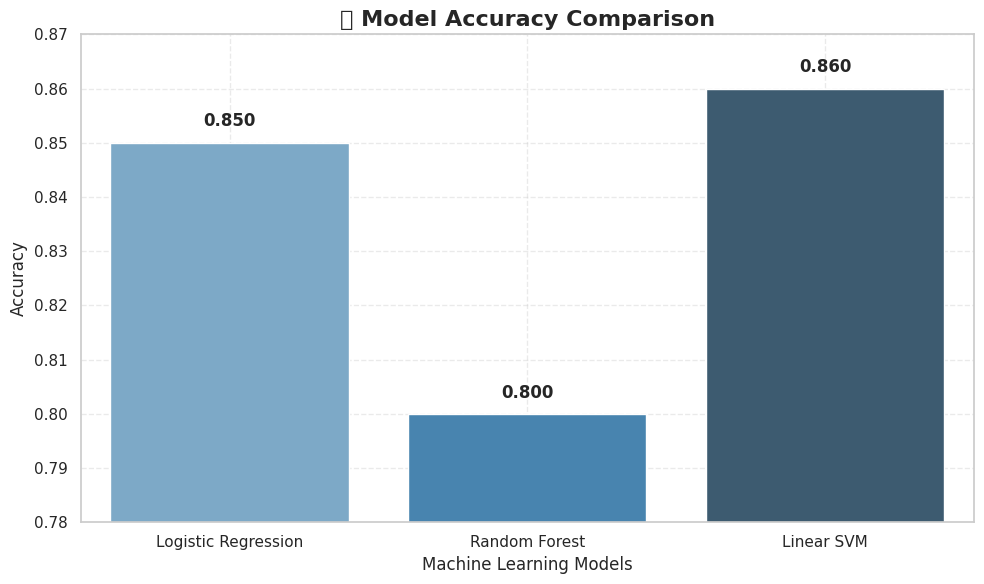

In [ ]:
# Plot comparison bar chart
accuracies = {
    "Logistic Regression": 0.850,
    "Random Forest": 0.800,
    "Linear SVM": 0.860
}

# Style settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette="Blues_d"
)

# Add value labels on bars
for i, (label, acc) in enumerate(accuracies.items()):
    bar.text(i, acc + 0.003, f"{acc:.3f}", ha='center', fontsize=12, fontweight='bold')

# Customize axes and title
plt.ylim(0.78, 0.87)
plt.title("🧪 Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# 7. Preprocessing for BERT

- Renames the target column to label (required for HuggingFace).
- Subtracts 1 to make class labels 0-indexed (BERT expects 0-based classes).

In [ ]:
#  BERT-specific label conversion
# 👇 This part is only needed for BERT fine-tuning
train_df = train_df.rename(columns={"Class Index": "label"})
test_df = test_df.rename(columns={"Class Index": "label"})
train_df["label"] = train_df["label"] - 1
test_df["label"] = test_df["label"] - 1

- Limits data to 3,000 training and 1,000 test samples to speed up BERT training.



In [ ]:
# ✅ TEMP: Reduce dataset size for faster training
train_df = train_df.head(3000)
test_df = test_df.head(1000)

# 8. Fine-Tuned BERT Implementation

- Loads pretrained BERT tokenizer and classifier.

## Tokenization:
- Text is tokenized with padding and truncation.

## Dataset Creation
- Custom dataset class to feed tokenized text and labels into BERT.

## Model and Training:
- Loads BERT with 4 output categories.
- Configures training parameters (batch size, epochs, logging).
- Runs the fine-tuning process and evaluates using compute_metrics().



In [ ]:
# ✅ Fine-Tuned BERT Implementation (Clean & Compatible Version)

import os
os.environ["WANDB_DISABLED"] = "true"  # Disable Weights & Biases logging

import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 2. Tokenize texts
def encode_texts(texts, max_length=64):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

train_encodings = encode_texts(train_df["Title"].tolist())
test_encodings = encode_texts(test_df["Title"].tolist())

train_labels = train_df["label"].tolist()
test_labels = test_df["label"].tolist()

# 3. Create PyTorch-compatible dataset
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = NewsDataset(train_encodings, train_labels)
test_dataset = NewsDataset(test_encodings, test_labels)

# 4. Load pre-trained BERT with classification head
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)

# 5. Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    #evaluation_strategy="epoch",
    save_strategy="no",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    logging_dir="./logs",
    #logging_strategy="epoch",
    load_best_model_at_end=False
)

# 6. Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

# 7. Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 8. Train and evaluate
trainer.train()

eval_result = trainer.evaluate()
print("\n✅ BERT Evaluation Results:")
print(eval_result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-14-207206978.py:76: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.439900



✅ BERT Evaluation Results:
{'eval_loss': 0.6473541259765625, 'eval_accuracy': 0.836, 'eval_f1': 0.8360944801778895, 'eval_precision': 0.8367222657530043, 'eval_recall': 0.836, 'eval_runtime': 117.1046, 'eval_samples_per_second': 8.539, 'eval_steps_per_second': 0.137, 'epoch': 3.0}


# 9. Accuracy Chart Including BERT
- Combines all model accuracies in a single chart for side-by-side comparison.



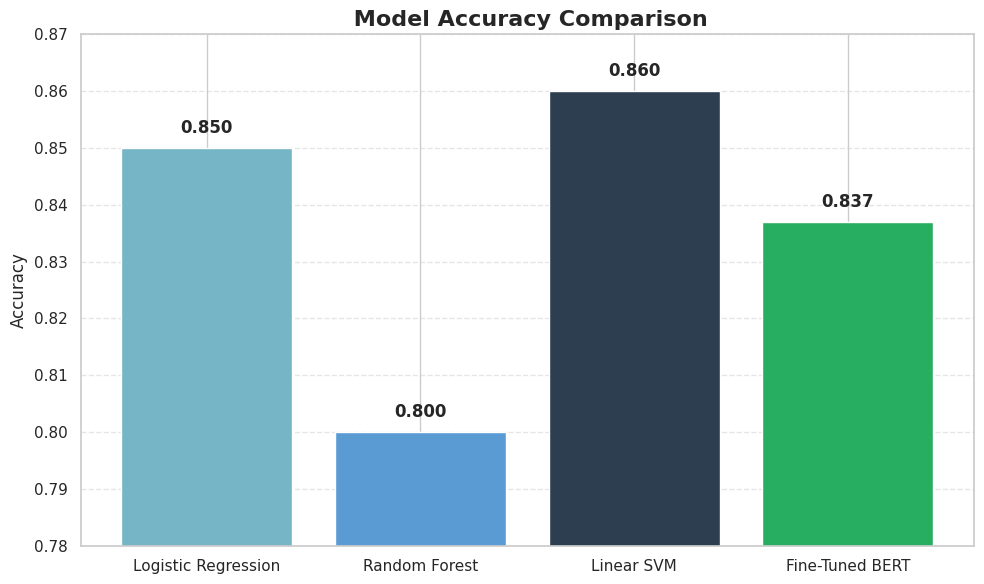

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores (from previous results)
accuracies = {
    "Logistic Regression": 0.850,
    "Random Forest": 0.800,
    "Linear SVM": 0.860,
    "Fine-Tuned BERT": 0.837
}

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=["#76b5c5", "#5a9bd4", "#2c3e50", "#27ae60"])

# Add value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.002, f"{height:.3f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Chart
plt.title(" Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.78, 0.87)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.show()


# 10. Sample Prediction on New Headlines Comparison (10 Samples)
- List of 10 hand-picked sample headlines with known true labels.

## Model Predictions:
- Applies TF-IDF models to the samples.

## BERT Predictions:
- BERT makes predictions without gradient computation (faster).

## Evaluation Table:
- Shows results using ✅ if prediction is correct or ❌ if wrong.

In [ ]:
# 10 Sample test headlines
sample_texts = [
    "Apple announces record earnings for Q4",                        # Business
    "NASA rover discovers signs of water on Mars",                   # Sci/Tech
    "Manchester United wins Champions League final",                # Sports
    "UN holds emergency meeting over Middle East crisis",           # World
    "Google unveils new quantum computing breakthrough",            # Sci/Tech
    "Stock markets dip amid economic uncertainty",                  # Business
    "Olympic committee announces new host city for 2032",           # Sports
    "WHO declares new global health emergency",                     # World
    "Facebook introduces AI-powered content moderation system",     # Sci/Tech
    "Federal Reserve hints at interest rate hike in next quarter"   # Business
]

true_labels = [
    "Business", "Sci/Tech", "Sports", "World", "Sci/Tech",
    "Business", "Sports", "World", "Sci/Tech", "Business"
]

# TF-IDF predictions
X_sample = vectorizer.transform(sample_texts)
lr_preds = models["Logistic Regression"].predict(X_sample)
rf_preds = models["Random Forest"].predict(X_sample)
svm_preds = models["Linear SVM"].predict(X_sample)

# Label map
label_map = {0: "World", 1: "Sports", 2: "Business", 3: "Sci/Tech"}
inverse_map = {v: k for k, v in label_map.items()}

# BERT predictions
encoded = tokenizer(sample_texts, padding=True, truncation=True, return_tensors='pt')
model.eval()
with torch.no_grad():
    outputs = model(**encoded)
    bert_preds = torch.argmax(outputs.logits, dim=1).tolist()
    bert_labels = [label_map[p] for p in bert_preds]

# Map numeric to label names
lr_labels = [label_map[p - 1] for p in lr_preds]
rf_labels = [label_map[p - 1] for p in rf_preds]
svm_labels = [label_map[p - 1] for p in svm_preds]

# ✅❌ markers
def mark(preds, trues):
    return [f"{p} ✅" if p == t else f"{p} ❌" for p, t in zip(preds, trues)]

# Create DataFrame
import pandas as pd
results_df = pd.DataFrame({
    "Text": sample_texts,
    "True Label": true_labels,
    "Logistic Regression": mark(lr_labels, true_labels),
    "Random Forest": mark(rf_labels, true_labels),
    "Linear SVM": mark(svm_labels, true_labels),
    "Fine-Tuned BERT": mark(bert_labels, true_labels)
})

from IPython.display import display
display(results_df)


,Text,True Label,Logistic Regression,Random Forest,Linear SVM,Fine-Tuned BERT
0,Apple announces record earnings for Q4,Business,Sci/Tech ❌,Sci/Tech ❌,Business ✅,Sci/Tech ❌
1,NASA rover discovers signs of water on Mars,Sci/Tech,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅
2,Manchester United wins Champions League final,Sports,Sports ✅,Sports ✅,Sports ✅,Sports ✅
3,UN holds emergency meeting over Middle East cr...,World,World ✅,World ✅,World ✅,World ✅
4,Google unveils new quantum computing breakthrough,Sci/Tech,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅
5,Stock markets dip amid economic uncertainty,Business,Business ✅,Business ✅,Business ✅,Business ✅
6,Olympic committee announces new host city for ...,Sports,Sports ✅,Sports ✅,Sports ✅,Sports ✅
7,WHO declares new global health emergency,World,World ✅,Sci/Tech ❌,World ✅,World ✅
8,Facebook introduces AI-powered content moderat...,Sci/Tech,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅,Sci/Tech ✅
9,Federal Reserve hints at interest rate hike in...,Business,Business ✅,Business ✅,Business ✅,Business ✅
